# ◼ **Proyecto Final** ◼ 
### ◼ **Barra Ortega Bianca Yamileth** ◼
### ◼ **14/12/2022** ◼

## ◼ **Importar Librerias** ◼

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## ◼ **Leer los datos** ◼

In [2]:
df = pd.read_csv("/content/seattle-weather.csv")

## ◼ **Analisis exploratorio de datos** ◼

Exploraremos y analizaremos el conjunto de datos para conocer mejor los datos con los que estaremos trabajando. 

In [3]:
#Imprimimos los primeros 5 registros del dataset.
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
#Obtenemos un pequeño resumen de todos los datos usando la funcion info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
#Usamos la funcion isnull() para verificar que no existan valores nulos en algun registro.
df.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


## ◼ **Visualización** ◼

In [6]:
#Usamos la funcion to_datetime() para cambiar el tipo de datos de la columna date a datetime.
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


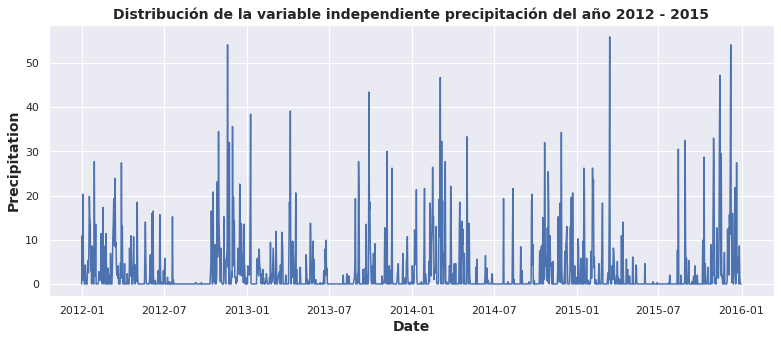

In [7]:
#Generamos una grafica de linea para visualizar la distribucion de la columna precipitation a lo largo de los años.
plt.figure(figsize=(13,5))
sns.set_theme()
sns.lineplot(x = 'date',y='precipitation',data=df)
plt.xlabel("Date",fontweight='bold',size=14)
plt.ylabel("Precipitation",fontweight='bold',size=14)
plt.title('Distribución de la variable independiente precipitación del año 2012 - 2015',fontweight='bold',fontsize = 14)
plt.show()

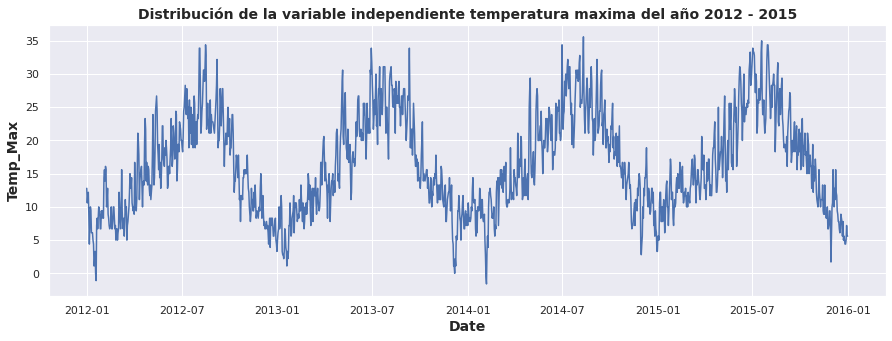

In [8]:
#Generamos una grafica de linea para visualizar la distribucion de la columna temp_max a lo largo de los años.
plt.figure(figsize=(15,5))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=df)
plt.xlabel("Date",fontweight='bold',size=14)
plt.ylabel("Temp_Max",fontweight='bold',size=14)
plt.title('Distribución de la variable independiente temperatura maxima del año 2012 - 2015',fontweight='bold',fontsize = 14)
plt.show()

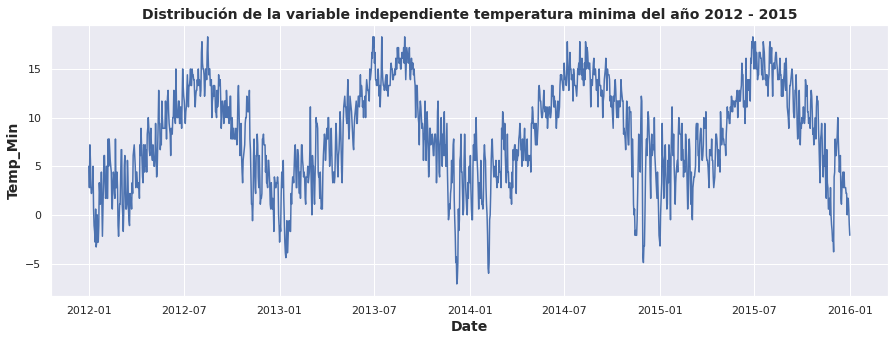

In [9]:
#Generamos una grafica de linea para visualizar la distribucion de la columna temp_min a lo largo de los años.
plt.figure(figsize=(15,5))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=df)
plt.xlabel("Date",fontweight='bold',size=14)
plt.ylabel("Temp_Min",fontweight='bold',size=14)
plt.title('Distribución de la variable independiente temperatura minima del año 2012 - 2015',fontweight='bold',fontsize = 14)
plt.show()

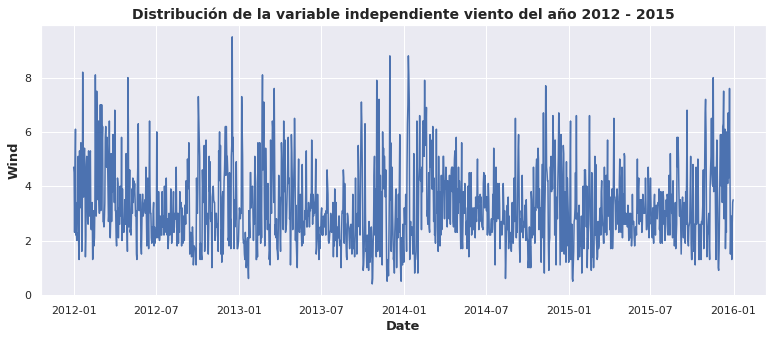

In [10]:
#Generamos una grafica de linea para visualizar la distribucion de la columna wind a lo largo de los años.
plt.figure(figsize=(13,5))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Wind",fontweight='bold',size=13)
plt.title('Distribución de la variable independiente viento del año 2012 - 2015',fontweight='bold',fontsize = 14)
plt.show()

## ◼ **Preparar datos para la creación de modelos** ◼

In [11]:
#Usando LabelEncoder() convertimos las variable a un formato numérico.
labelencoder = LabelEncoder()
df.weather = labelencoder.fit_transform(df.weather)

In [12]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [13]:
#Usamos la funcion drop() para eliminar la columna date y separamos el dataset para obtener las columnas de entrenamiento y prueba.
df = df.drop('date',axis=1)
x = df.drop('weather',axis=1)
y = df['weather']

In [14]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [15]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [16]:
#Partimos el conjunto de datos para obtener las muestras de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


In [18]:
#Estandarizamos los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ◼ **Aplicar modelos de clasificación** ◼

## ◼ **Decision Tree Classifier** ◼

In [19]:
#Entrenamos el modelo
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 0, 2, 4, 4, 2, 2, 2, 4, 2, 0, 2, 4, 1, 0, 4, 1, 2, 2, 2, 2, 2,
       2, 4, 4, 0, 4, 2, 0, 4, 2, 4, 3, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 2,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 1, 4, 2, 2, 3, 2, 0, 1, 4, 2, 0, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 1, 2, 3, 4, 0, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 2, 4, 4, 0, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 1, 4, 2,
       1, 2, 0, 4, 2, 4, 4, 0, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 1, 2, 1, 4, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 0,
       2, 4, 2, 2, 1, 4, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 1, 4, 1, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 2, 4, 2, 0, 0, 2, 2, 2, 2, 1, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 0, 2, 4, 0, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4,
       1, 2, 4, 2, 4, 1, 4, 4, 2, 2, 0, 1, 2, 4, 2, 4, 2, 2, 2, 0, 0, 4,
       2, 4, 2, 2, 1, 2, 4, 2, 1, 2, 2, 4, 2, 4, 2,

In [21]:
#Creamos y guardamos la matriz de confusión, la precisión y el reporte de clasificacion de este modelo.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm1 = confusion_matrix(y_test, y_pred)
acc1 = accuracy_score(y_test, y_pred)
class_rep1 = classification_report(y_test, y_pred)

## ◼ **K Nearest Neighbor (KNM)** ◼

In [22]:
#Entrenamos el modelo
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 2, 2, 4, 0, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 1, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 2, 2, 4, 1, 2, 4, 2, 2, 2, 4, 4, 1, 2,
       4, 1, 4, 2, 2, 2, 2, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 2,
       4, 2, 4, 0, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 0, 4, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 1,
       1, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       1, 1, 4, 4, 4, 4, 4, 4, 2, 1, 4, 2, 1, 4, 4, 4, 1, 4, 2, 2, 4, 1,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 2, 4, 1, 4, 1,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 0, 4,
       1, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [24]:
#Creamos y guardamos la matriz de confusión, la precisión y el reporte de clasificacion de este modelo.
cm2 = confusion_matrix(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)
class_rep2 = classification_report(y_test, y_pred)

## ◼ **Resultados** ◼

Imprimimos la matriz de confusión de cada modelo para analizar las predicciones que realizó cada modelo

In [25]:
#Imprimimos la matriz de confusión de cada modelo.
print("Confusion Matrix")
print("-----------------------------------------------------")
print("Decision Tree Classifier:")
print(f"{cm1}")
print("-----------------------------------------------------")
print("K Nearest Neighbor:")
print(f"{cm2}")
print("-----------------------------------------------------")

Confusion Matrix
-----------------------------------------------------
Decision Tree Classifier:
[[  1   2   1   0   7]
 [  6   8   1   0  16]
 [  0   1 140   4  10]
 [  0   0   3   3   0]
 [ 18  23   9   0 113]]
-----------------------------------------------------
K Nearest Neighbor:
[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]
-----------------------------------------------------


Creamos una grafica para poder visualizar de forma mas atractiva la precision que obtivo cada uno de los modelos.

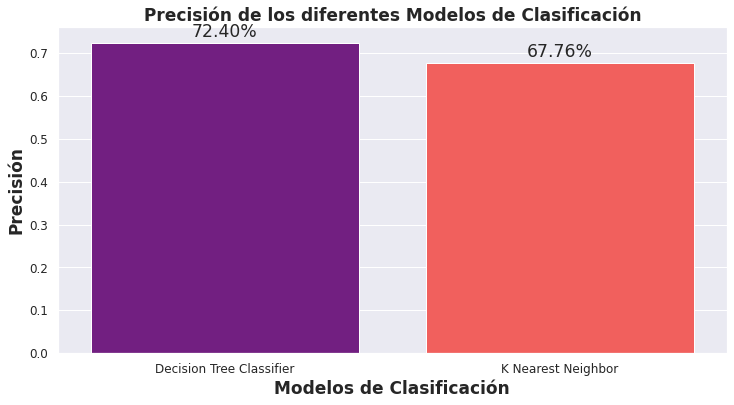

In [26]:
#Graficamos la precision de cada modelo.
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Decision Tree Classifier")
mylist.append(acc2)
mylist2.append("K Nearest Neighbor")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x=mylist2, y=mylist, palette = "magma", saturation =1.5)
plt.xlabel("Modelos de Clasificación", fontsize = 17, fontweight='bold')
plt.ylabel("Precisión", fontsize = 17, fontweight='bold')
plt.title("Precisión de los diferentes Modelos de Clasificación", fontsize = 17, fontweight='bold')
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Imprimimos un reporte de clasificacion por cada modelo para analizar resultados.

In [27]:
#Imprimimos la matriz de confusión de cada modelo.
print("Confusion Matrix")
print("-----------------------------------------------------")
print("Decision Tree Classifier:")
print(f"{class_rep1}")
print("-----------------------------------------------------")
print("K Nearest Neighbor:")
print(f"{class_rep2}")
print("-----------------------------------------------------")

Confusion Matrix
-----------------------------------------------------
Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.04      0.09      0.06        11
           1       0.24      0.26      0.25        31
           2       0.91      0.90      0.91       155
           3       0.43      0.50      0.46         6
           4       0.77      0.69      0.73       163

    accuracy                           0.72       366
   macro avg       0.48      0.49      0.48       366
weighted avg       0.76      0.72      0.74       366

-----------------------------------------------------
K Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.14      0.09      0.11        11
           1       0.16      0.13      0.14        31
           2       0.77      0.82      0.80       155
           3       1.00      0.17      0.29         6
           4       0.68      0.71      0.69       163

    accuracy  

## ◼ **Comparación de resultados** ◼

Si analizamos los resultados anteriores podemos llegar a una conclusión en base al desempeño que obtuvo cada modelo 

*   ***Decision Tree Classifier:*** Podemos notar que el arbol de desición obtuvo un f1 score por cada posible prediccion de clima en este caso obtuvo **0.06%** en predicciones para llovizna, un **0.25%** en prediccones para niebla, **0.91%** en predicciones para lluvia, **0.46%** en predicciones para nieve y un **0.73** en predicciones para clima soleado, terminando con una precision o accuracy del **0.72%** como desempeño general.

*   ***K Nearest Neighbor:*** Por otro lado el knn tambien obtuvo un f1 score por cada posible prediccion de clima a lo que en este caso se obtuvo un **0.11%** en predicciones para llovizna, un **0.14%** en prediccones para niebla, **0.80%** en predicciones para lluvia, **0.29%** en predicciones para nieve y un **0.69** en predicciones para clima soleado, terminando con una precision o accuracy del **0.68%** como desempeño general.

Por lo tanto podemos concluir que a pesar de que la diferencia de rendimiento no es tan escandalosa tanto en accuracy como en f1 score en los dos modelos, considero que el modelo mas adecuado para este conjunto de datos y las predicciones del clima en base a los factores dados, es el modelo de **arboles de desición.**